In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#displays all columns in dataframe even if millions
pd.pandas.set_option('display.max_columns',None)


In [10]:
dataset=pd.read_csv("data/slurm_job_data.csv")

print(dataset.shape)

(6423, 56)


In [11]:
dataset.head()

,job_db_inx,mod_time,deleted,account,admin_comment,array_task_str,array_max_tasks,array_task_pending,constraints,container,cpus_req,derived_ec,derived_es,env_hash_inx,exit_code,extra,flags,failed_node,job_name,id_assoc,id_array_job,id_array_task,id_block,id_job,id_qos,id_resv,id_wckey,id_user,id_group,het_job_id,het_job_offset,kill_requid,state_reason_prev,licenses,mcs_label,mem_req,nodelist,nodes_alloc,node_inx,partition,priority,script_hash_inx,state,timelimit,time_submit,time_eligible,time_start,time_end,time_suspended,gres_used,wckey,work_dir,submit_line,system_comment,tres_alloc,tres_req
0,1,1712825772,0,root,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,NaN,bash,2,0,4294967294,NaN,1,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,None assigned,0,NaN,gpu,9615996,0,5,120,1712825769,1712825769,1712825769,1712825769,0,NaN,NaN,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 --pty /bin/bash,NaN,NaN,"1=1,2=3800,4=1,5=1"
1,3,1712825777,0,root,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,NaN,bash,2,0,4294967294,NaN,2,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,None assigned,0,NaN,gpu,9615996,0,5,120,1712825774,1712825774,1712825774,1712825774,0,NaN,NaN,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,NaN,"1=1,2=3800,4=1,5=1"
2,5,1712825852,0,root,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,NaN,bash,2,0,4294967294,NaN,3,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,None assigned,0,NaN,gpu,9615996,0,5,120,1712825850,1712825850,1712825850,1712825850,0,NaN,NaN,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,NaN,"1=1,2=3800,4=1,5=1"
3,7,1712827427,0,root,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,NaN,bash,2,0,4294967294,NaN,4,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,None assigned,0,NaN,gpu,9615996,0,5,120,1712827150,1712827150,1712827150,1712827150,0,NaN,NaN,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,3=18446744073709551614,"1=1,2=3800,4=1,5=1"
4,9,1712827427,0,root,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,NaN,bash,2,0,4294967294,NaN,5,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,None assigned,0,NaN,gpu,9615996,0,5,120,1712827343,1712827343,1712827343,1712827343,0,NaN,NaN,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,NaN,"1=1,2=3800,4=1,5=1"


In [12]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

account 0.0841  % missing values
admin_comment 1.0  % missing values
array_task_str 1.0  % missing values
constraints 1.0  % missing values
container 1.0  % missing values
derived_es 1.0  % missing values
extra 1.0  % missing values
failed_node 0.9992  % missing values
id_block 1.0  % missing values
kill_requid 0.8222  % missing values
licenses 1.0  % missing values
mcs_label 1.0  % missing values
node_inx 0.1882  % missing values
gres_used 1.0  % missing values
wckey 1.0  % missing values
system_comment 1.0  % missing values
tres_alloc 0.1881  % missing values


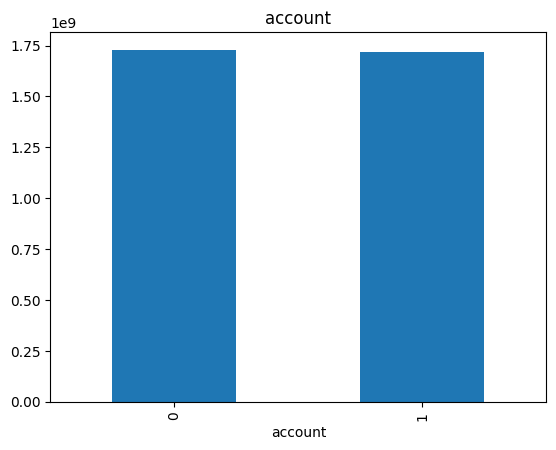

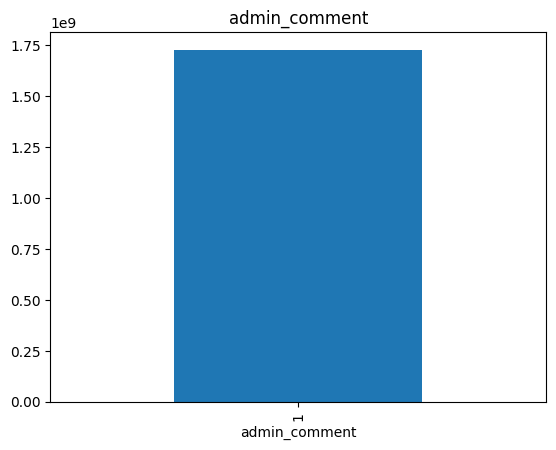

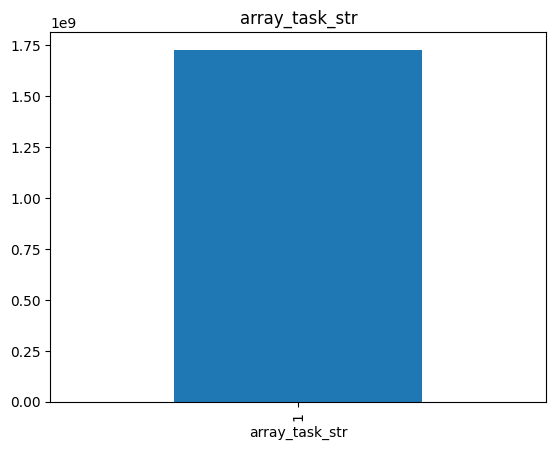

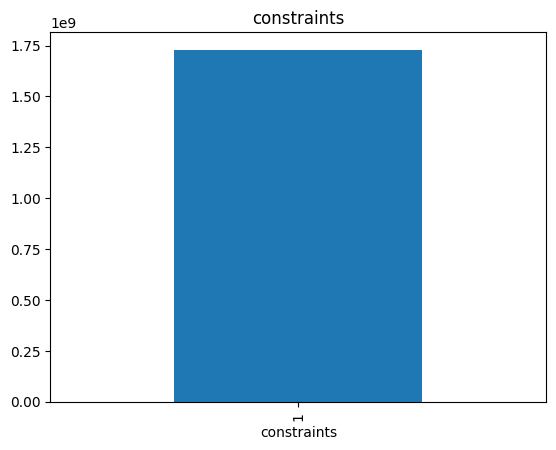

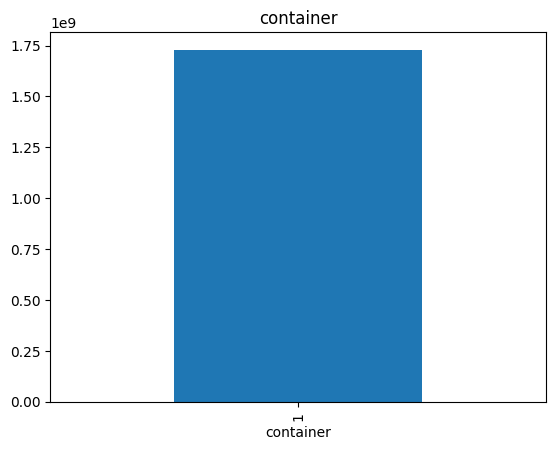

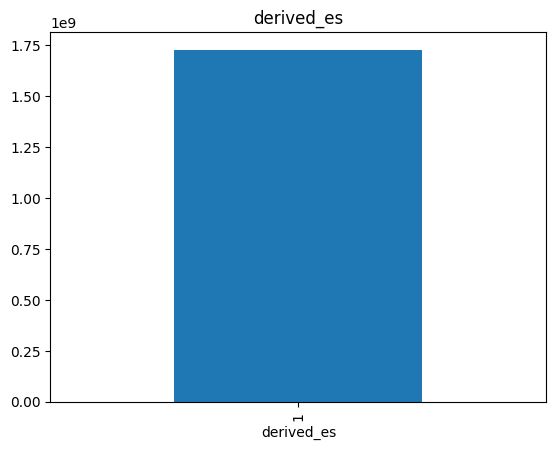

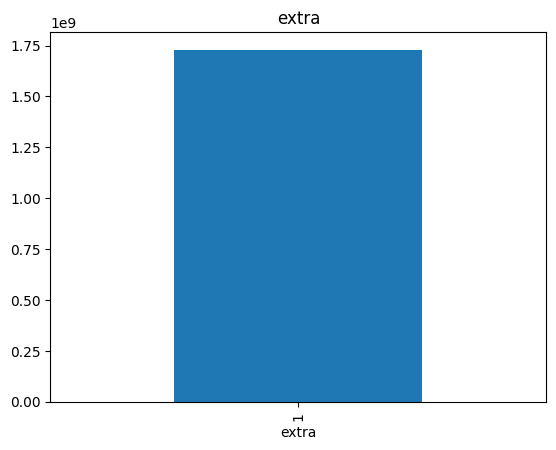

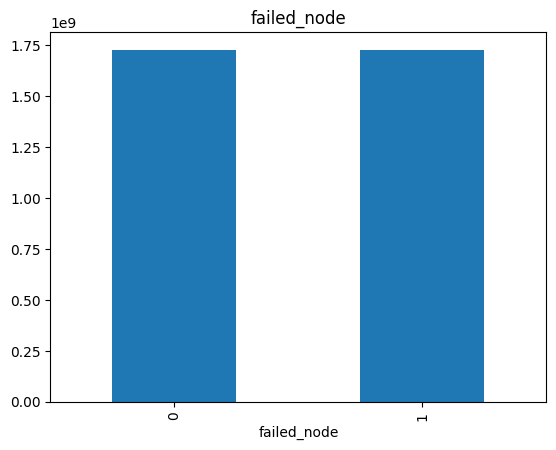

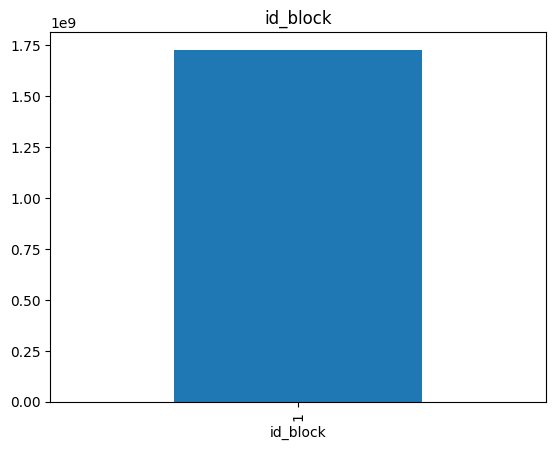

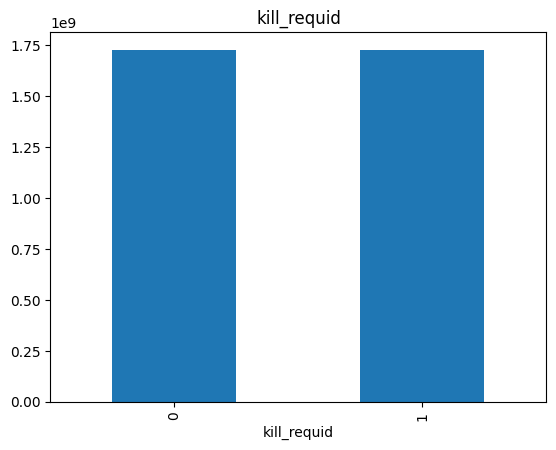

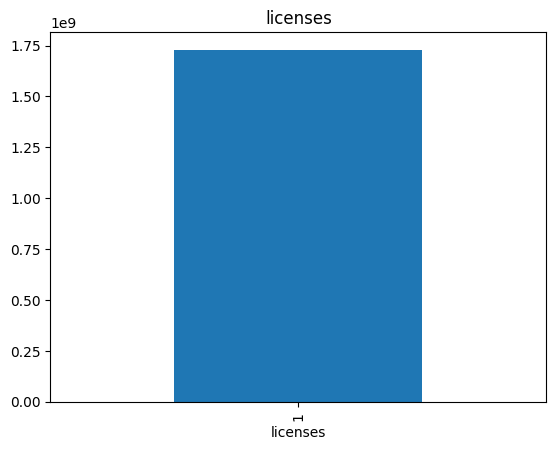

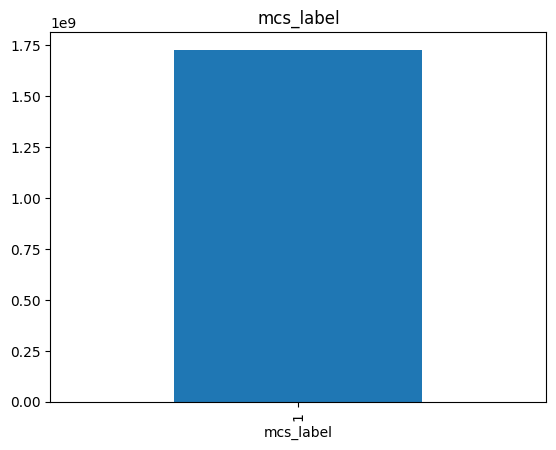

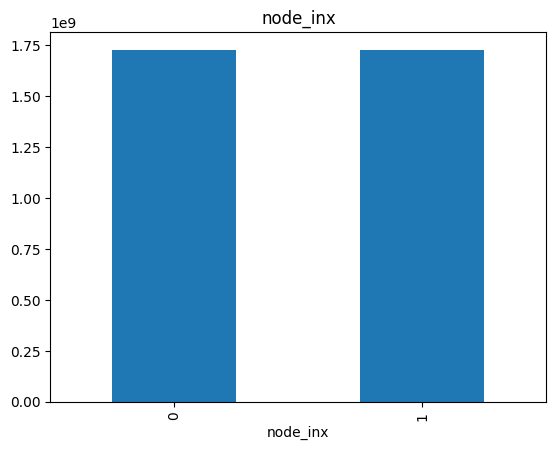

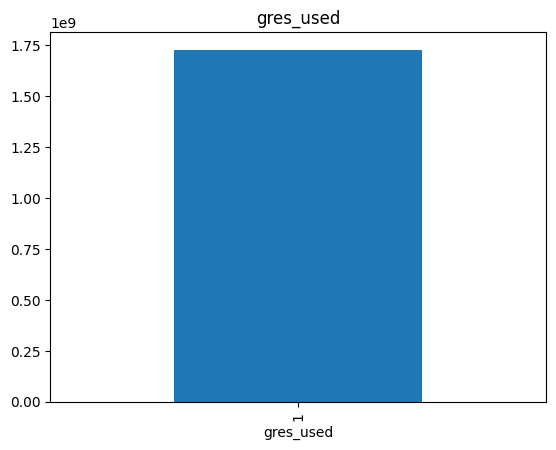

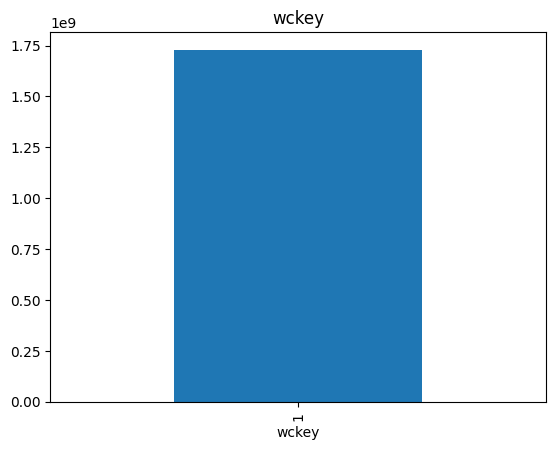

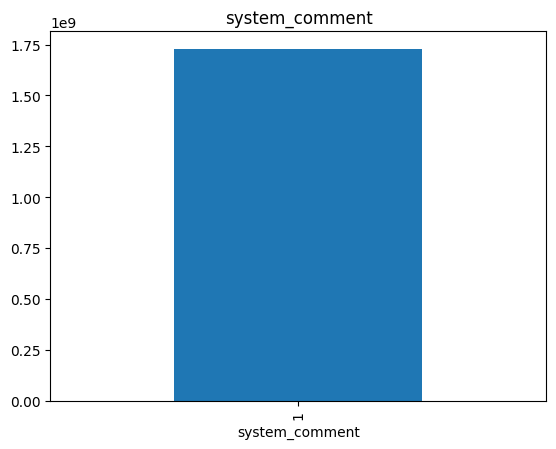

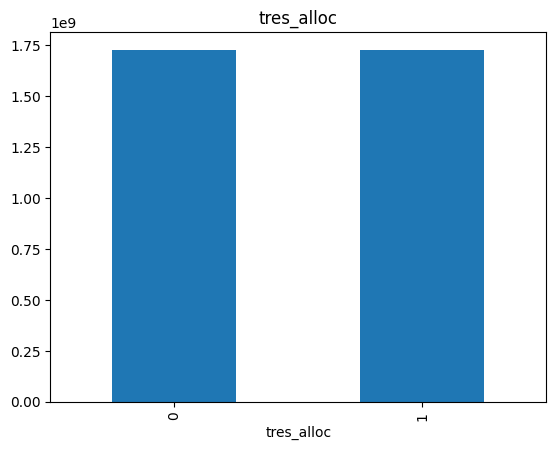

In [13]:
for feature in features_with_na:
    data = dataset.copy()
    

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean END where the information is missing or present
    data.groupby(feature)['time_end'].median().plot.bar()
    plt.title(feature)
    plt.show()

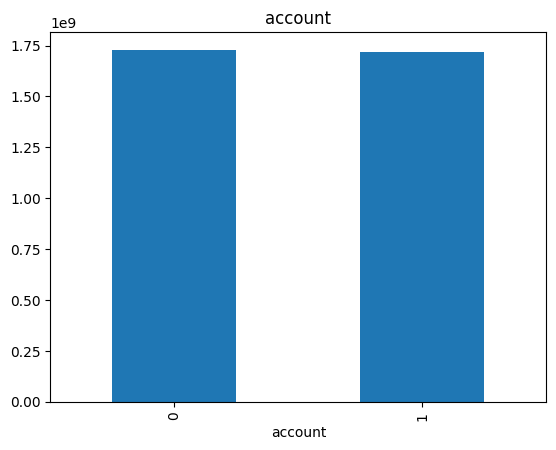

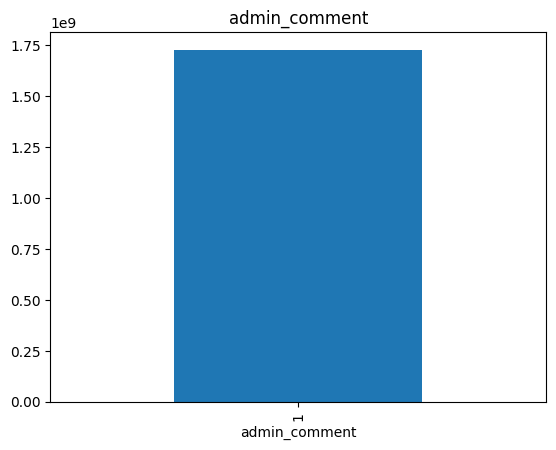

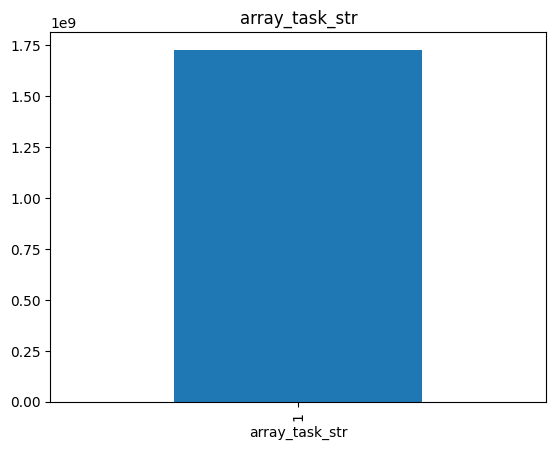

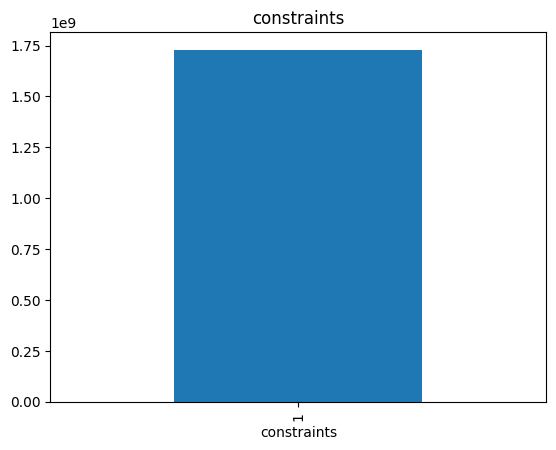

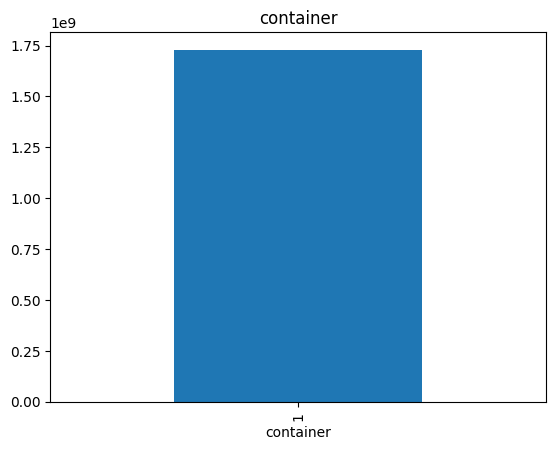

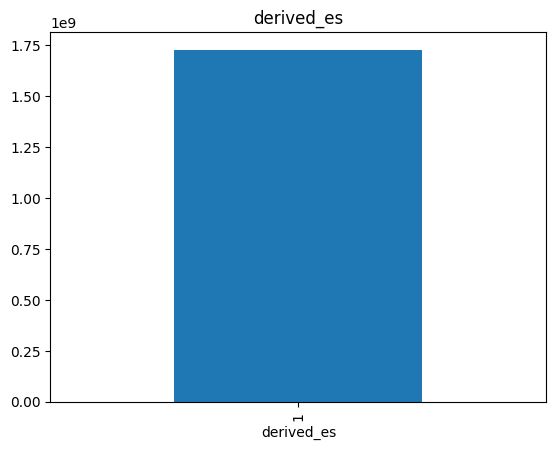

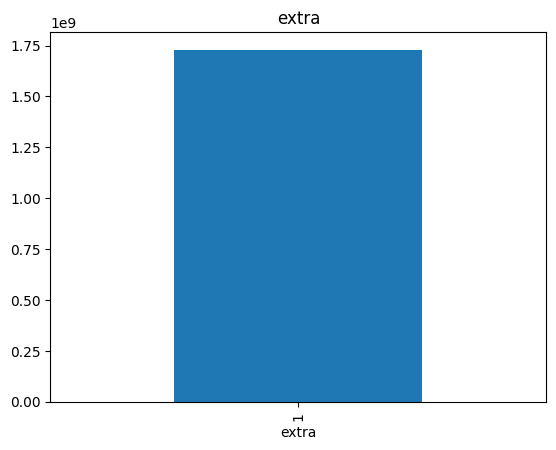

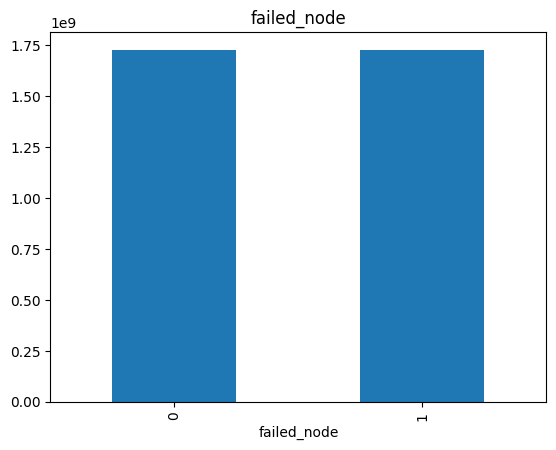

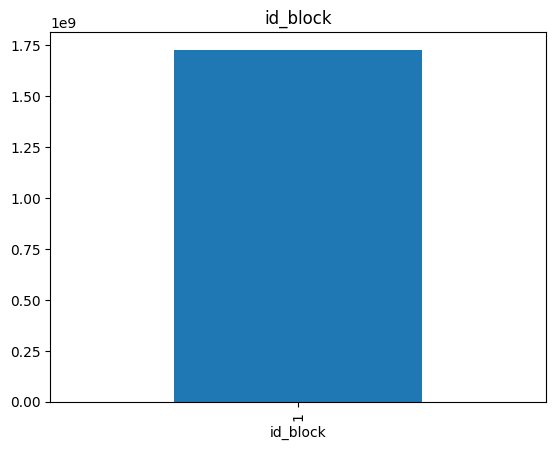

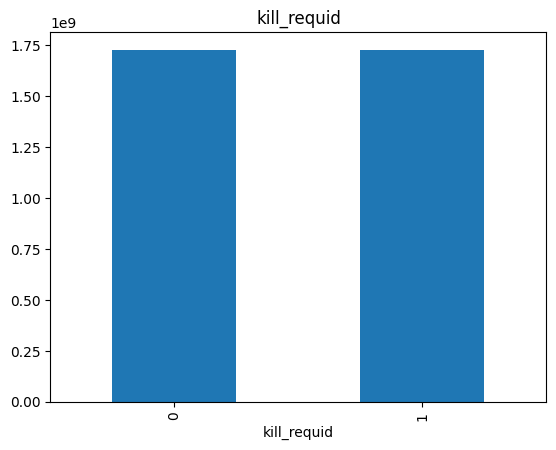

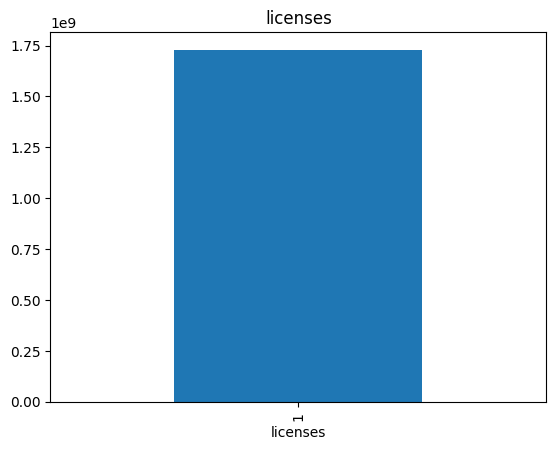

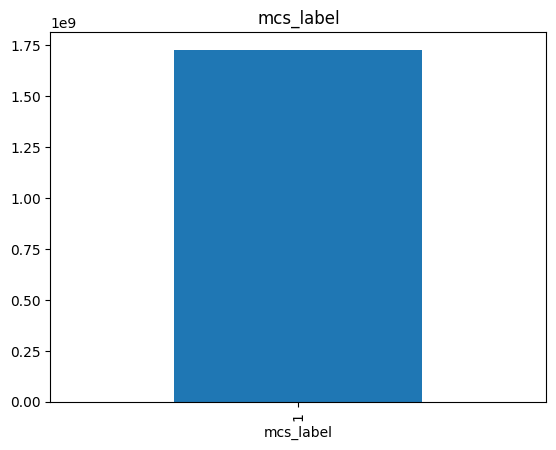

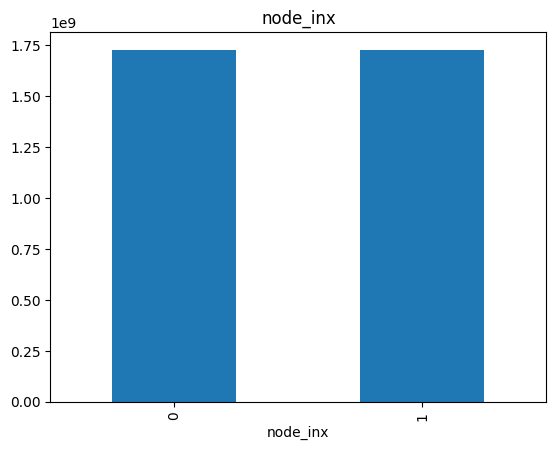

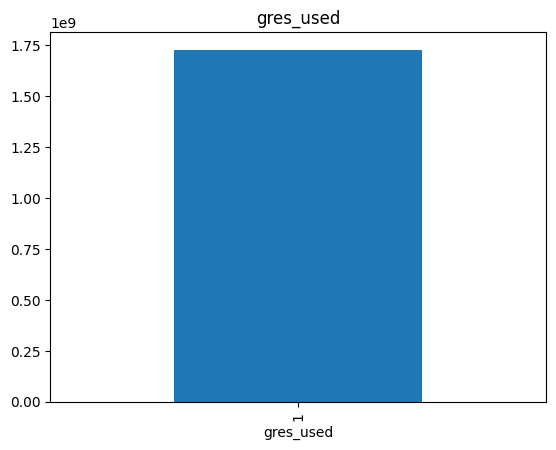

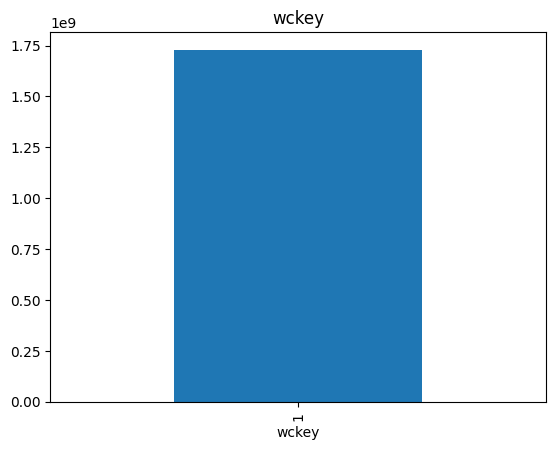

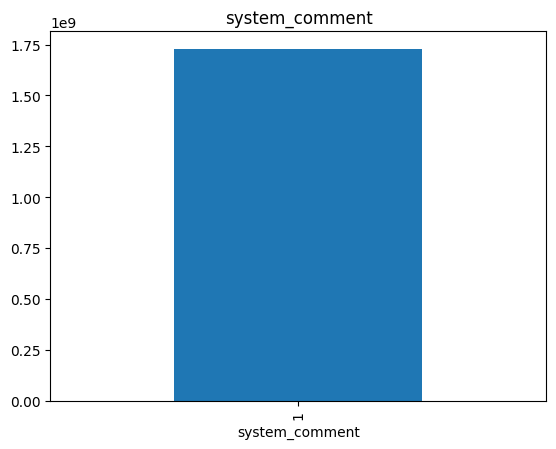

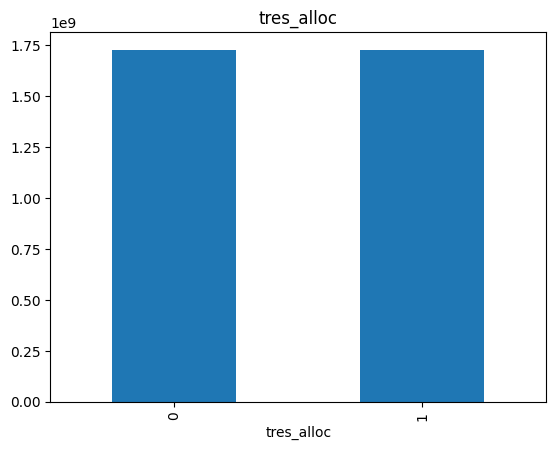

In [14]:
for feature in features_with_na:
    data = dataset.copy()
    

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean END where the information is missing or present
    data.groupby(feature)['time_end'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  46


,job_db_inx,mod_time,deleted,admin_comment,array_task_str,array_max_tasks,array_task_pending,constraints,container,cpus_req,derived_ec,derived_es,env_hash_inx,exit_code,extra,flags,id_assoc,id_array_job,id_array_task,id_block,id_job,id_qos,id_resv,id_wckey,id_user,id_group,het_job_id,het_job_offset,kill_requid,state_reason_prev,licenses,mcs_label,mem_req,nodes_alloc,priority,script_hash_inx,state,timelimit,time_submit,time_eligible,time_start,time_end,time_suspended,gres_used,wckey,system_comment
0,1,1712825772,0,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,2,0,4294967294,NaN,1,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,0,9615996,0,5,120,1712825769,1712825769,1712825769,1712825769,0,NaN,NaN,NaN
1,3,1712825777,0,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,2,0,4294967294,NaN,2,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,0,9615996,0,5,120,1712825774,1712825774,1712825774,1712825774,0,NaN,NaN,NaN
2,5,1712825852,0,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,2,0,4294967294,NaN,3,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,0,9615996,0,5,120,1712825850,1712825850,1712825850,1712825850,0,NaN,NaN,NaN
3,7,1712827427,0,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,2,0,4294967294,NaN,4,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,0,9615996,0,5,120,1712827150,1712827150,1712827150,1712827150,0,NaN,NaN,NaN
4,9,1712827427,0,NaN,NaN,0,0,NaN,NaN,1,0,NaN,0,256,NaN,16,2,0,4294967294,NaN,5,1,0,0,0,0,0,4294967294,NaN,0,NaN,NaN,9223372036854779608,0,9615996,0,5,120,1712827343,1712827343,1712827343,1712827343,0,NaN,NaN,NaN


In [16]:
numerical_features

['job_db_inx',
 'mod_time',
 'deleted',
 'admin_comment',
 'array_task_str',
 'array_max_tasks',
 'array_task_pending',
 'constraints',
 'container',
 'cpus_req',
 'derived_ec',
 'derived_es',
 'env_hash_inx',
 'exit_code',
 'extra',
 'flags',
 'id_assoc',
 'id_array_job',
 'id_array_task',
 'id_block',
 'id_job',
 'id_qos',
 'id_resv',
 'id_wckey',
 'id_user',
 'id_group',
 'het_job_id',
 'het_job_offset',
 'kill_requid',
 'state_reason_prev',
 'licenses',
 'mcs_label',
 'mem_req',
 'nodes_alloc',
 'priority',
 'script_hash_inx',
 'state',
 'timelimit',
 'time_submit',
 'time_eligible',
 'time_start',
 'time_end',
 'time_suspended',
 'gres_used',
 'wckey',
 'system_comment']

In [17]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables (Countables) 


discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 32


In [18]:
discrete_feature

['deleted',
 'admin_comment',
 'array_task_str',
 'array_max_tasks',
 'array_task_pending',
 'constraints',
 'container',
 'derived_ec',
 'derived_es',
 'env_hash_inx',
 'exit_code',
 'extra',
 'flags',
 'id_array_job',
 'id_array_task',
 'id_block',
 'id_qos',
 'id_resv',
 'id_wckey',
 'het_job_id',
 'het_job_offset',
 'state_reason_prev',
 'licenses',
 'mcs_label',
 'mem_req',
 'nodes_alloc',
 'script_hash_inx',
 'state',
 'time_suspended',
 'gres_used',
 'wckey',
 'system_comment']

Grouped data for deleted:
 deleted
0    1.728729e+09
Name: time_end, dtype: float64


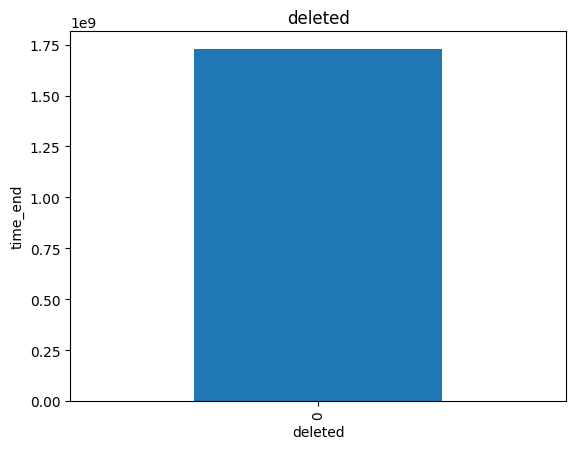

Grouped data for admin_comment:
 Series([], Name: time_end, dtype: float64)
No data to plot for admin_comment.
Grouped data for array_task_str:
 Series([], Name: time_end, dtype: float64)
No data to plot for array_task_str.
Grouped data for array_max_tasks:
 array_max_tasks
0    1.728729e+09
Name: time_end, dtype: float64


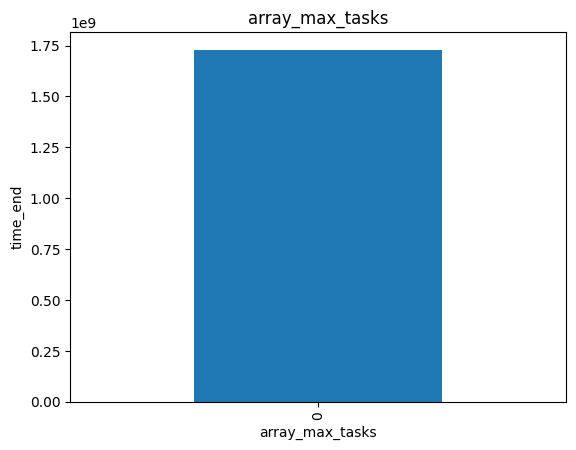

Grouped data for array_task_pending:
 array_task_pending
0    1.728729e+09
Name: time_end, dtype: float64


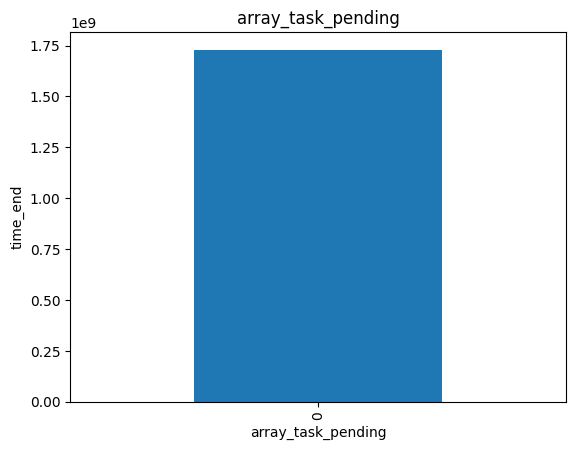

Grouped data for constraints:
 Series([], Name: time_end, dtype: float64)
No data to plot for constraints.
Grouped data for container:
 Series([], Name: time_end, dtype: float64)
No data to plot for container.
Grouped data for derived_ec:
 derived_ec
0        1.728729e+09
2        1.723102e+09
9        1.728760e+09
13       1.719827e+09
15       1.719814e+09
134      1.730342e+09
139      1.730202e+09
256      1.723102e+09
512      1.729344e+09
1280     1.719827e+09
3328     1.729115e+09
4007     1.718282e+09
4021     1.719821e+09
5003     1.722517e+09
5004     1.728477e+09
5005     1.718188e+09
32256    1.730870e+09
32512    1.724783e+09
33280    1.722591e+09
65280    1.730722e+09
Name: time_end, dtype: float64


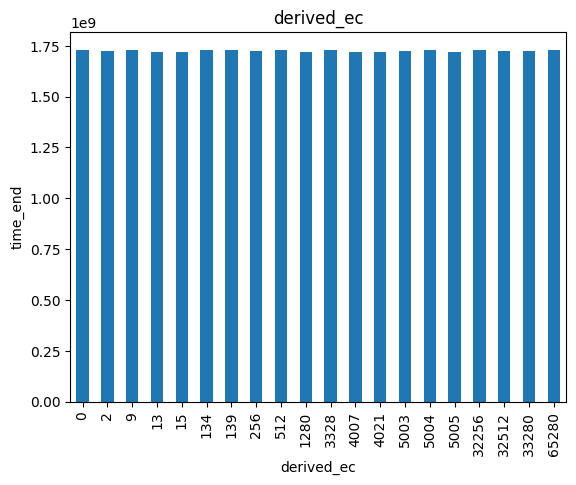

Grouped data for derived_es:
 Series([], Name: time_end, dtype: float64)
No data to plot for derived_es.
Grouped data for env_hash_inx:
 env_hash_inx
0    1.728729e+09
Name: time_end, dtype: float64


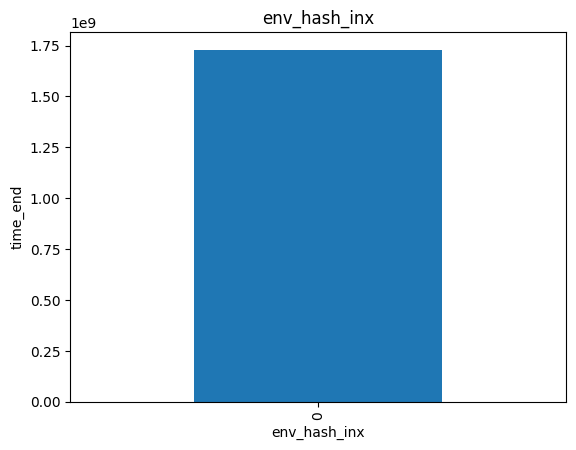

Grouped data for exit_code:
 exit_code
0        1.728729e+09
9        1.728769e+09
15       1.721209e+09
256      1.728723e+09
512      1.730138e+09
1536     1.728105e+09
3328     1.729115e+09
4007     1.718282e+09
4021     1.723097e+09
4352     1.728577e+09
5003     1.722517e+09
5632     1.725638e+09
32256    1.719554e+09
32512    1.729317e+09
33280    1.722591e+09
33792    1.729681e+09
34304    1.730041e+09
35584    1.729025e+09
35840    1.728477e+09
52480    1.728761e+09
65280    1.729968e+09
Name: time_end, dtype: float64


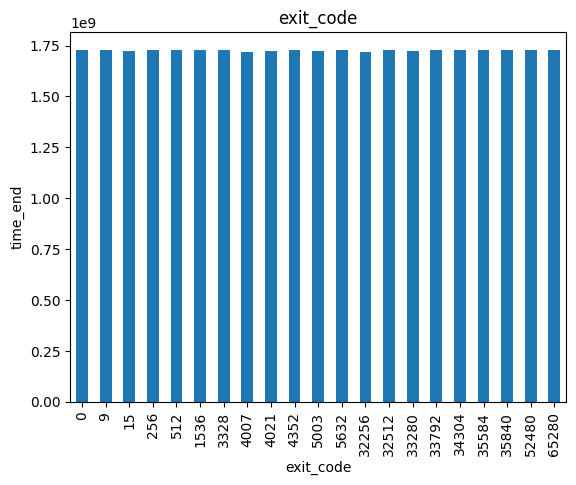

Grouped data for extra:
 Series([], Name: time_end, dtype: float64)
No data to plot for extra.
Grouped data for flags:
 flags
16    1.728729e+09
18    1.723101e+09
20    1.728753e+09
24    1.729158e+09
Name: time_end, dtype: float64


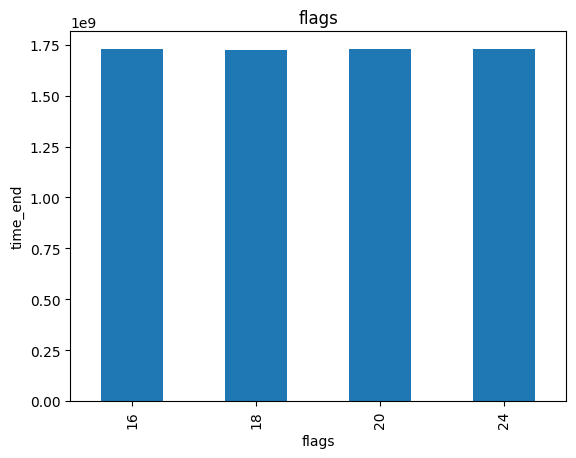

Grouped data for id_array_job:
 id_array_job
0    1.728729e+09
Name: time_end, dtype: float64


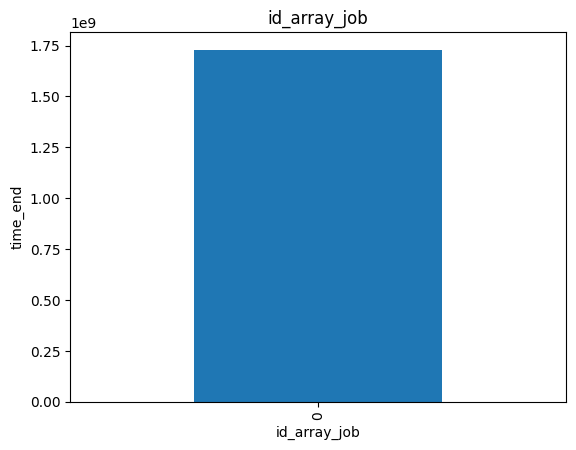

Grouped data for id_array_task:
 id_array_task
4294967294    1.728729e+09
Name: time_end, dtype: float64


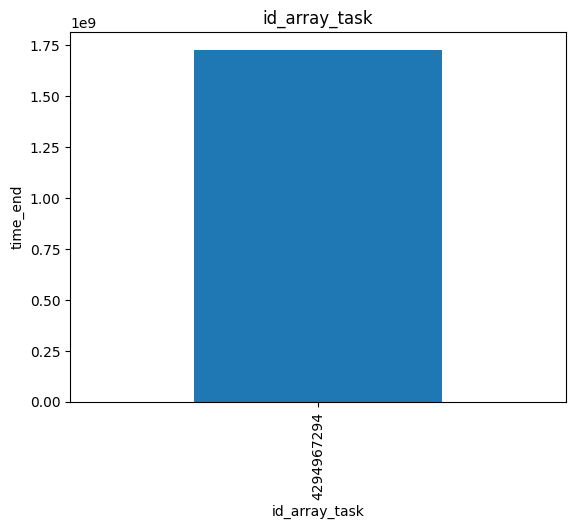

Grouped data for id_block:
 Series([], Name: time_end, dtype: float64)
No data to plot for id_block.
Grouped data for id_qos:
 id_qos
1     1.728729e+09
17    1.728038e+09
20    1.726049e+09
Name: time_end, dtype: float64


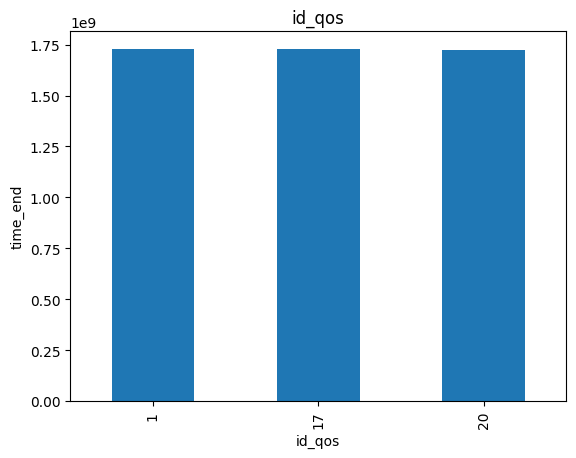

Grouped data for id_resv:
 id_resv
0    1.728729e+09
Name: time_end, dtype: float64


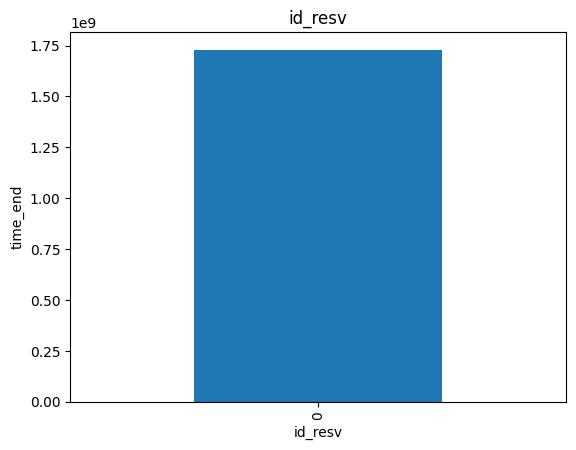

Grouped data for id_wckey:
 id_wckey
0    1.728729e+09
Name: time_end, dtype: float64


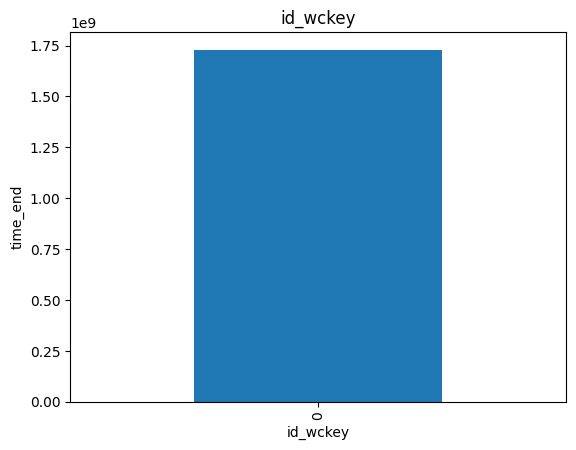

Grouped data for het_job_id:
 het_job_id
0    1.728729e+09
Name: time_end, dtype: float64


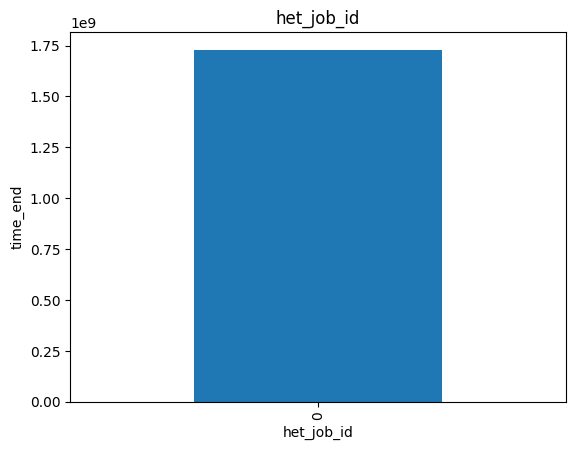

Grouped data for het_job_offset:
 het_job_offset
4294967294    1.728729e+09
Name: time_end, dtype: float64


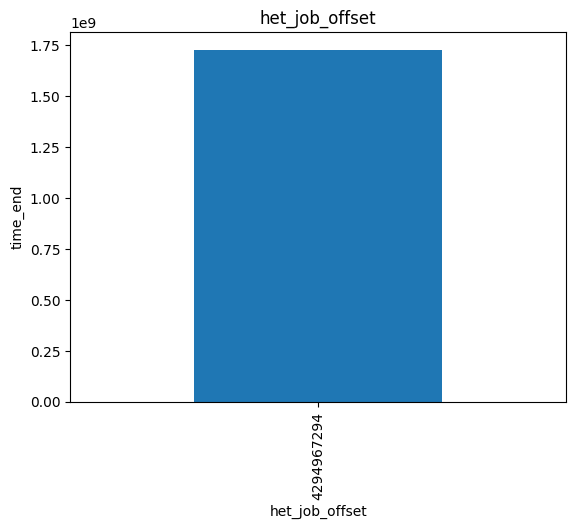

Grouped data for state_reason_prev:
 state_reason_prev
0     1.728729e+09
9     1.728770e+09
15    1.723033e+09
16    1.714117e+09
51    1.724392e+09
Name: time_end, dtype: float64


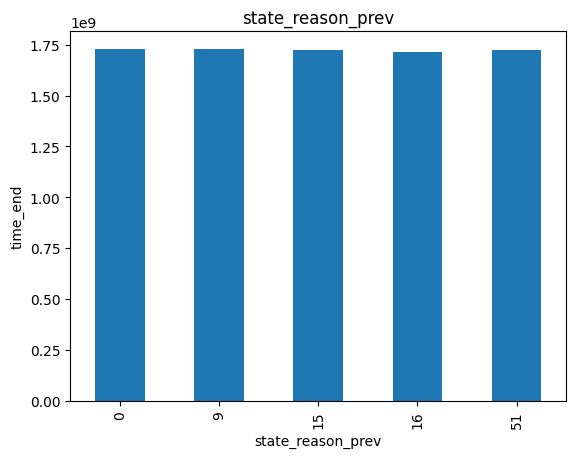

Grouped data for licenses:
 Series([], Name: time_end, dtype: float64)
No data to plot for licenses.
Grouped data for mcs_label:
 Series([], Name: time_end, dtype: float64)
No data to plot for mcs_label.
Grouped data for mem_req:
 mem_req
100                    1.729278e+09
1000                   1.725595e+09
4096                   1.731419e+09
51200                  1.730262e+09
9223372036854775908    1.721629e+09
9223372036854779608    1.728729e+09
Name: time_end, dtype: float64


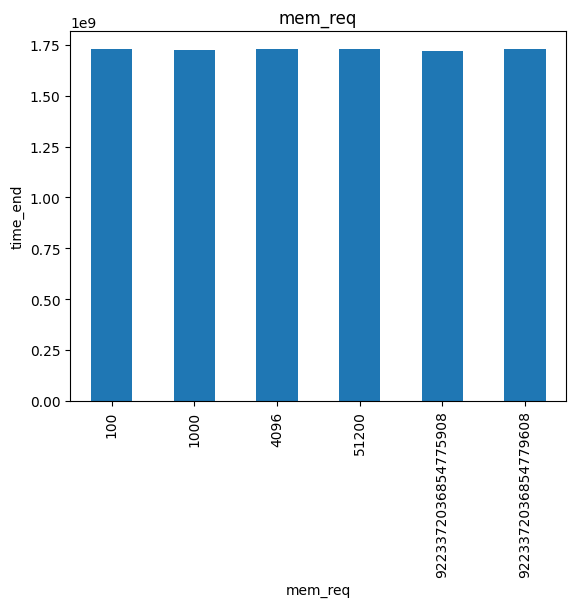

Grouped data for nodes_alloc:
 nodes_alloc
0     1.728729e+09
1     1.728760e+09
2     1.728762e+09
3     1.729266e+09
4     1.728764e+09
5     1.729308e+09
6     1.731666e+09
7     1.723871e+09
8     1.728685e+09
10    1.718209e+09
11    1.718197e+09
12    1.728728e+09
14    1.719416e+09
15    1.731664e+09
16    1.728959e+09
20    1.724453e+09
Name: time_end, dtype: float64


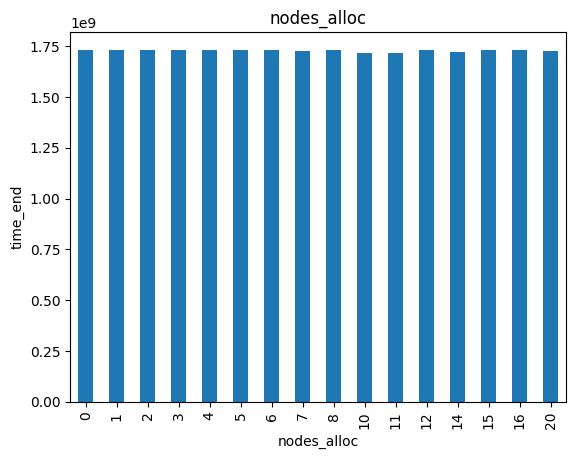

Grouped data for script_hash_inx:
 script_hash_inx
0    1.728729e+09
Name: time_end, dtype: float64


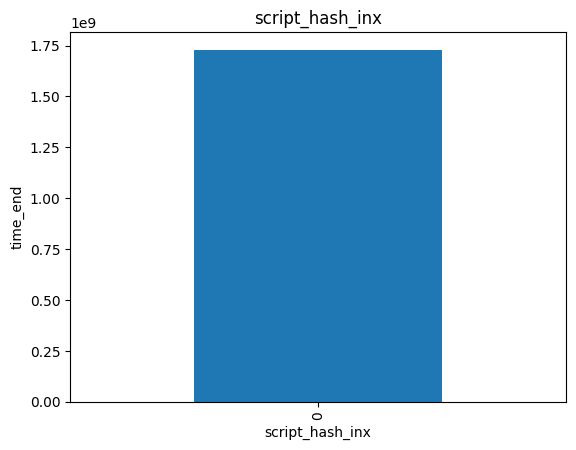

Grouped data for state:
 state
0       0.000000e+00
3       1.729192e+09
4       1.728729e+09
5       1.728828e+09
6       1.714681e+09
7       1.728765e+09
1024    1.714117e+09
Name: time_end, dtype: float64


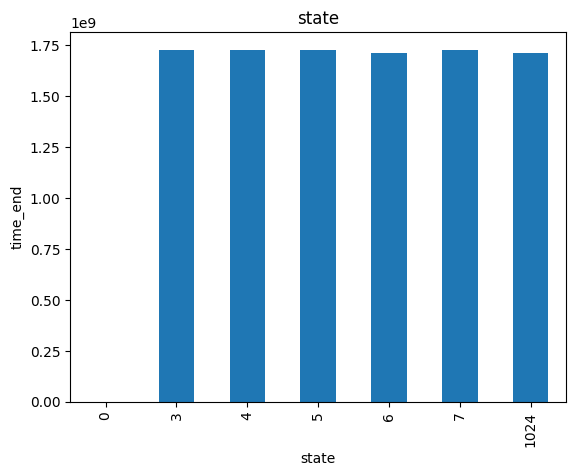

Grouped data for time_suspended:
 time_suspended
0     1.728729e+09
1     1.728760e+09
2     1.728762e+09
3     1.728763e+09
4     1.728760e+09
5     1.728762e+09
6     1.728543e+09
7     1.728769e+09
18    1.728561e+09
20    1.728542e+09
25    1.728476e+09
28    1.728477e+09
29    1.728476e+09
30    1.728510e+09
38    1.727764e+09
50    1.728475e+09
Name: time_end, dtype: float64


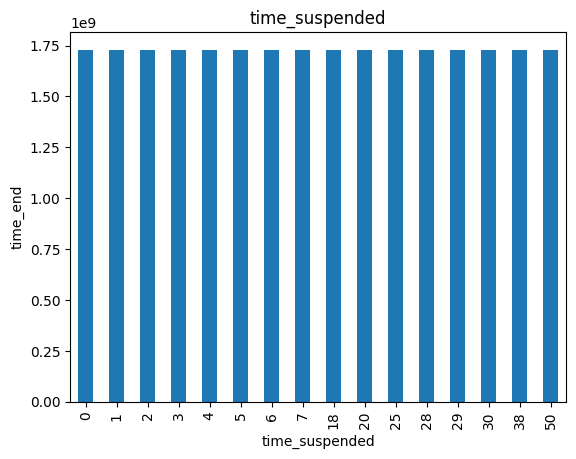

Grouped data for gres_used:
 Series([], Name: time_end, dtype: float64)
No data to plot for gres_used.
Grouped data for wckey:
 Series([], Name: time_end, dtype: float64)
No data to plot for wckey.
Grouped data for system_comment:
 Series([], Name: time_end, dtype: float64)
No data to plot for system_comment.


In [19]:
for feature in discrete_feature:
    data = dataset.copy()
    
    # Drop rows with NaN in the feature or 'time_end'
    data = data.dropna(subset=[feature, 'time_end'])
    
    # Group by feature and calculate median
    grouped_data = data.groupby(feature)['time_end'].median()
    print(f'Grouped data for {feature}:\n', grouped_data)
    
    # Check if grouped_data is not empty
    if not grouped_data.empty:
        grouped_data.plot.bar()
        plt.xlabel(feature)
        plt.ylabel('time_end')
        plt.title(feature)
        plt.show()
    else:
        print(f"No data to plot for {feature}.")


In [20]:

## There is a relationship between variable number and end time

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


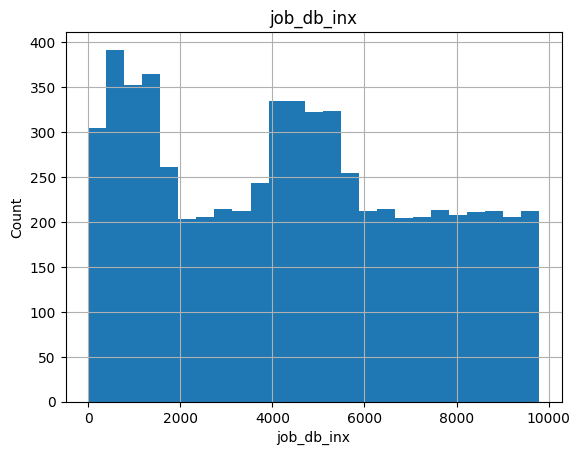

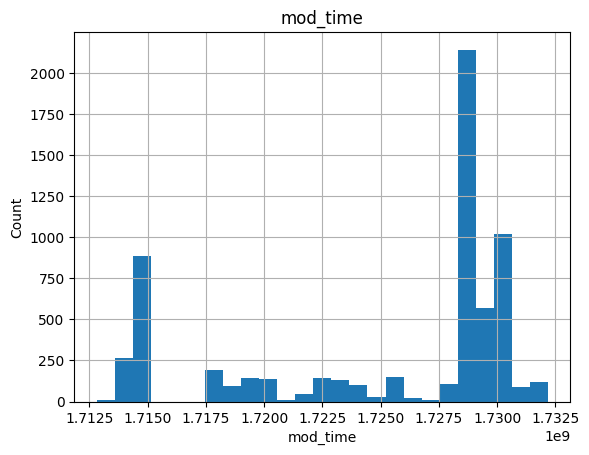

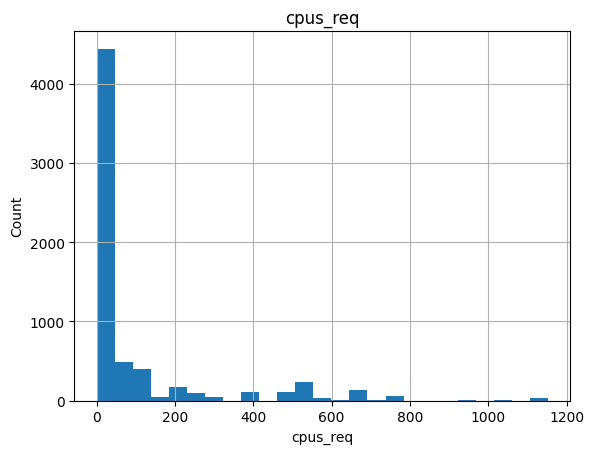

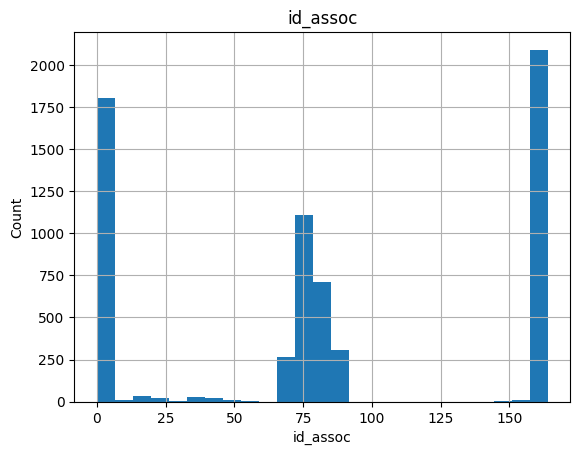

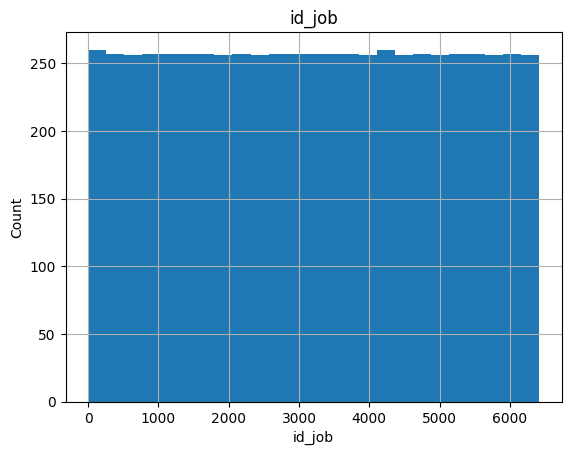

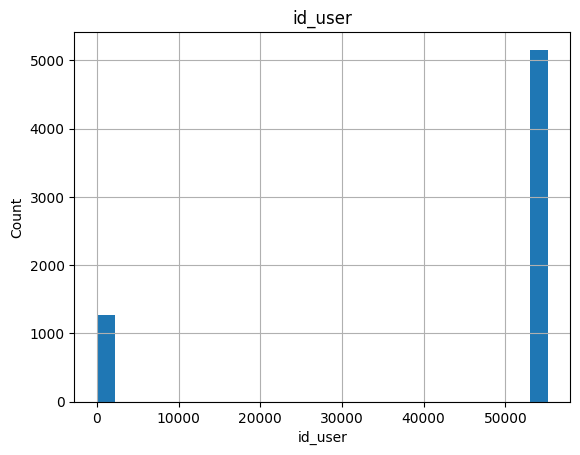

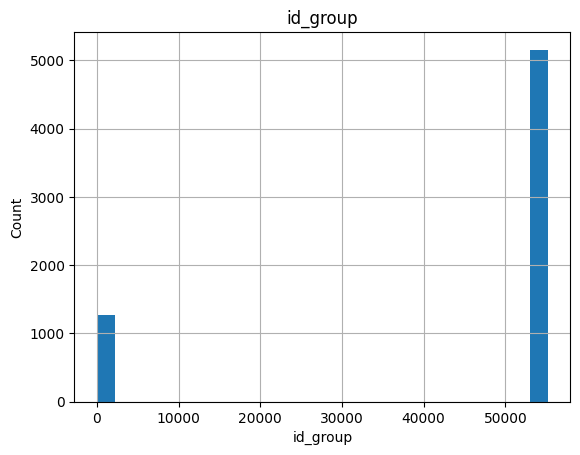

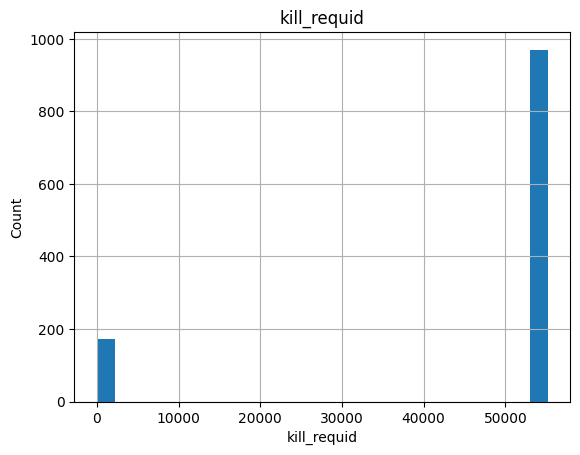

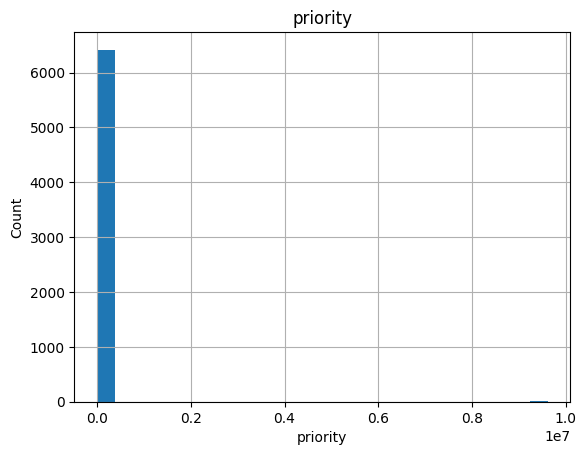

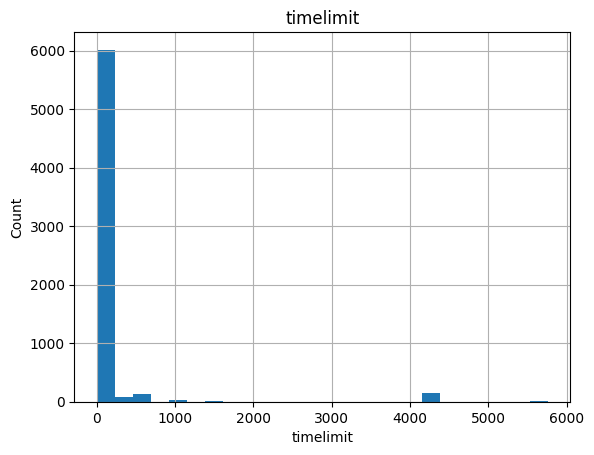

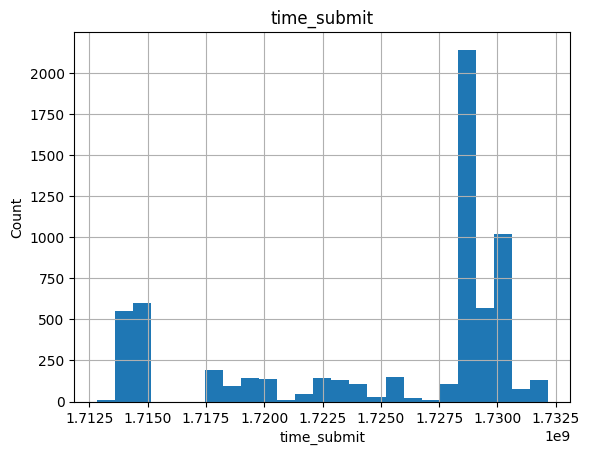

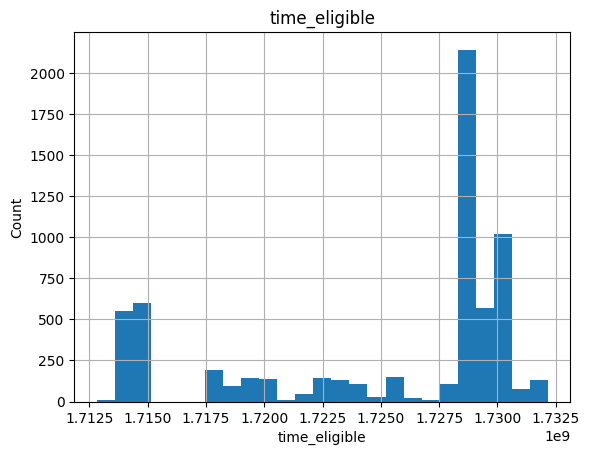

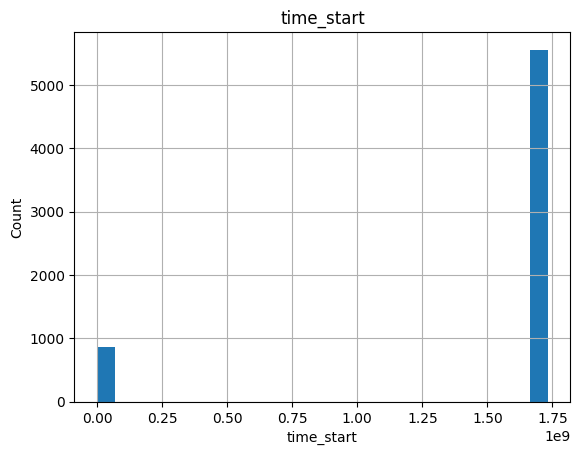

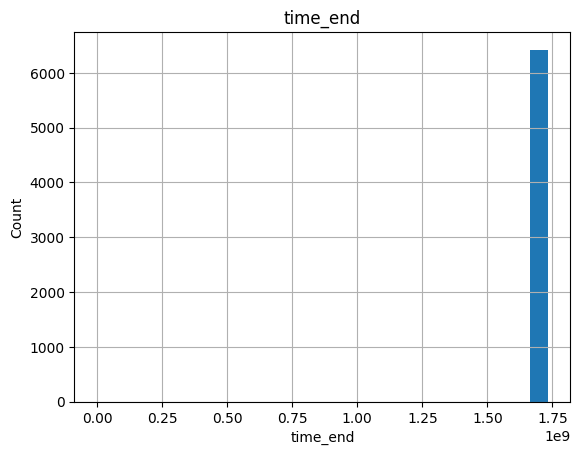

In [21]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

d:\CDAC_PROJECTS\full_package_of_slurm_project\Monitoring_Portal_ML\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


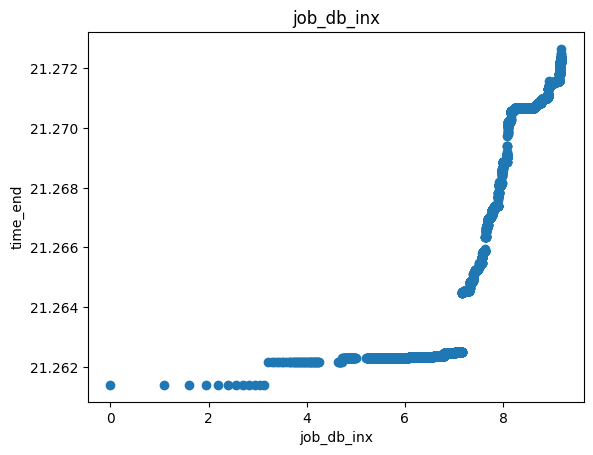

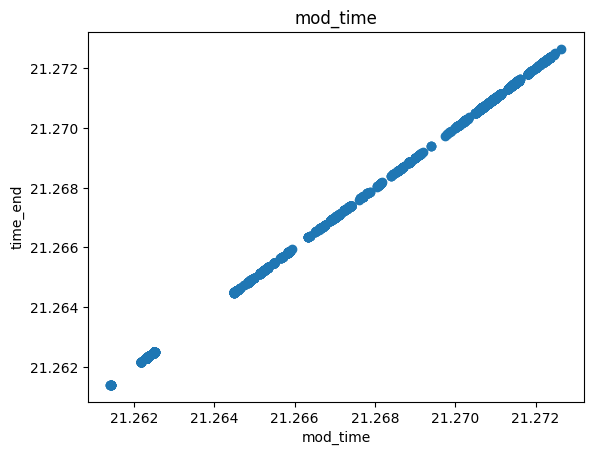

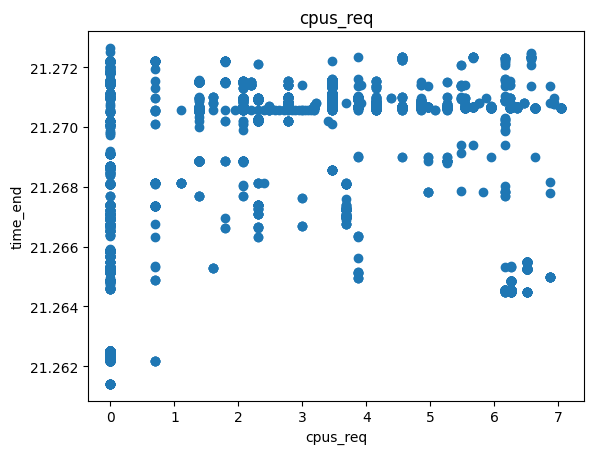

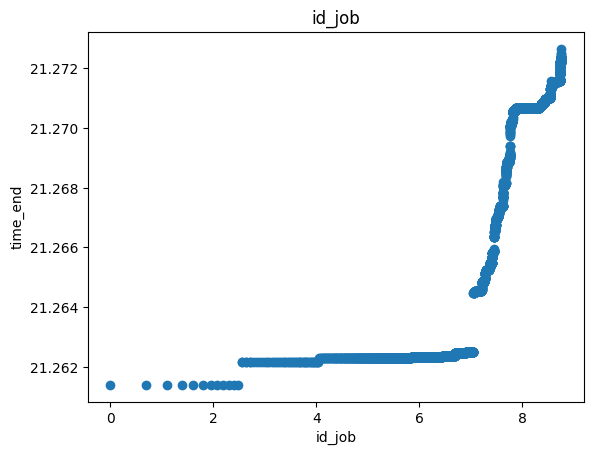

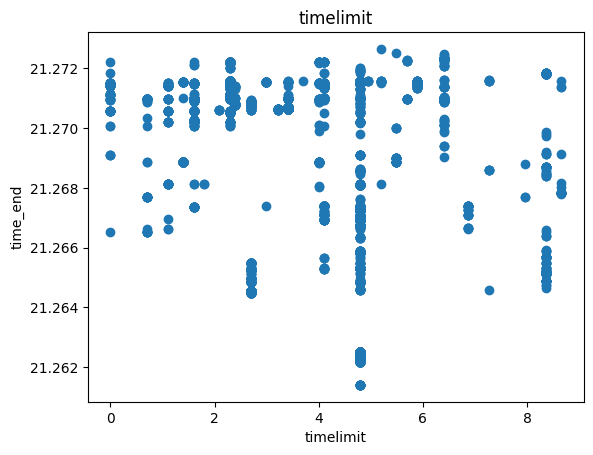

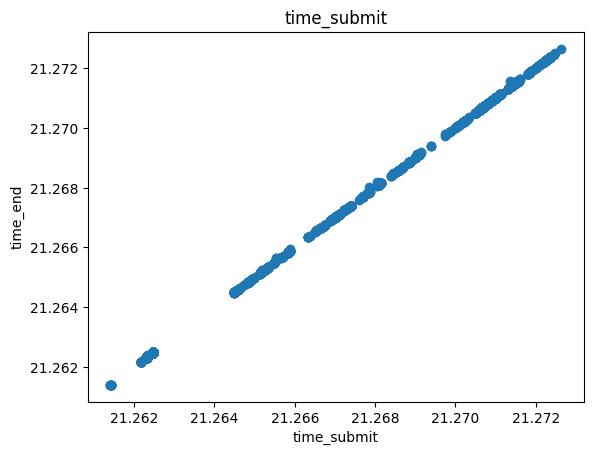

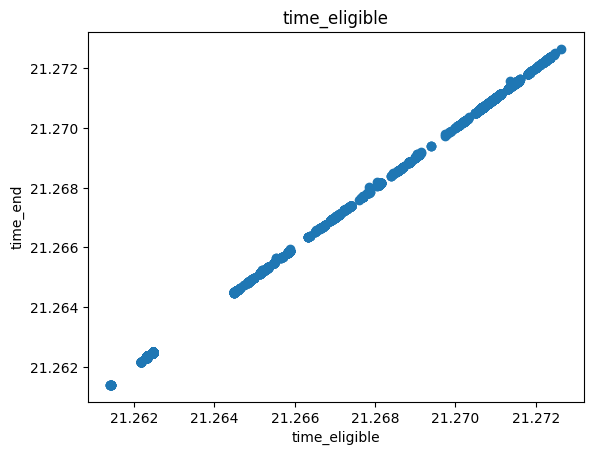

In [22]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): #
        pass
    else:
        data[feature]=np.log(data[feature])
        data['time_end']=np.log(data['time_end'])
        plt.scatter(data[feature],data['time_end'])
        plt.xlabel(feature)
        plt.ylabel('time_end')
        plt.title(feature)
        plt.show()

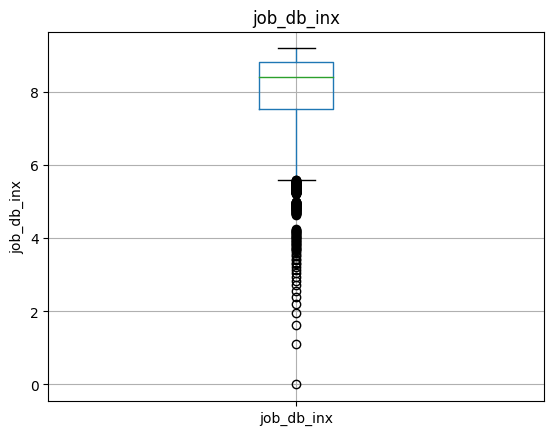

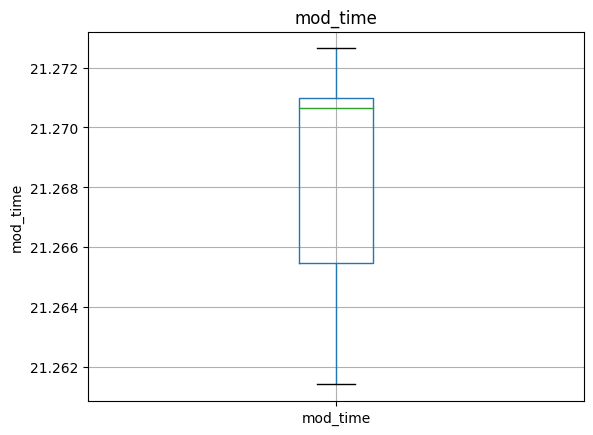

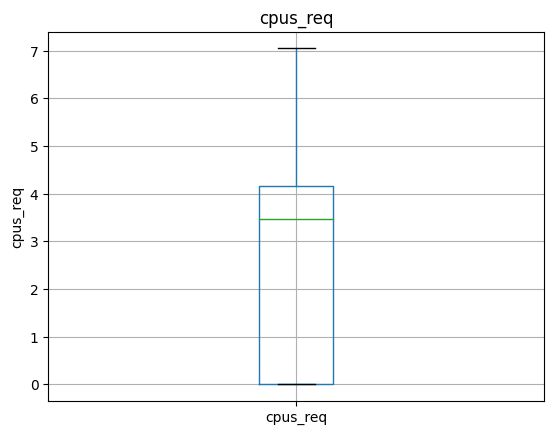

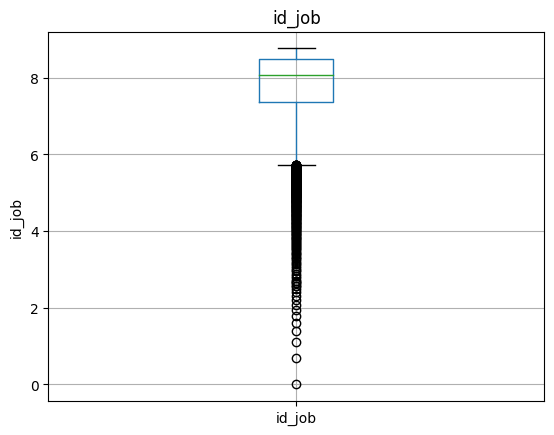

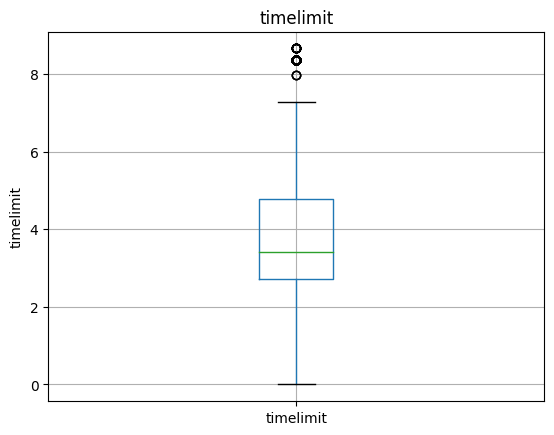

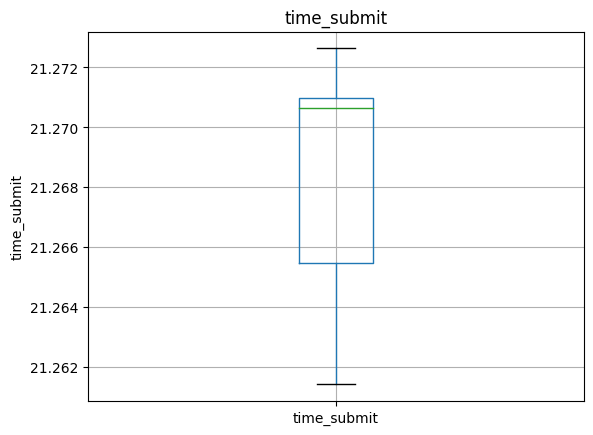

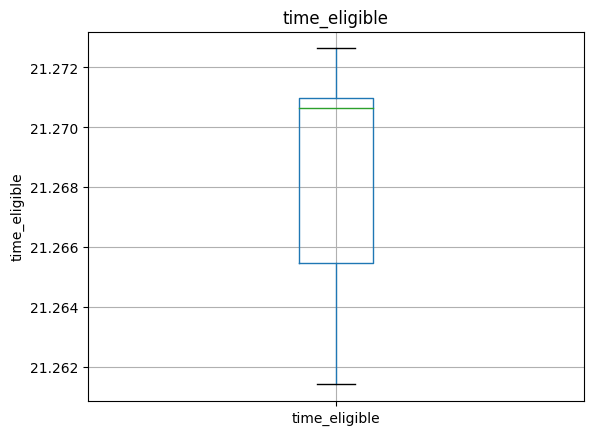

In [23]:
## outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

In [24]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['account',
 'failed_node',
 'job_name',
 'nodelist',
 'node_inx',
 'partition',
 'work_dir',
 'submit_line',
 'tres_alloc',
 'tres_req']

In [25]:
dataset[categorical_features].head()

,account,failed_node,job_name,nodelist,node_inx,partition,work_dir,submit_line,tres_alloc,tres_req
0,root,NaN,bash,None assigned,NaN,gpu,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 --pty /bin/bash,NaN,"1=1,2=3800,4=1,5=1"
1,root,NaN,bash,None assigned,NaN,gpu,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,"1=1,2=3800,4=1,5=1"
2,root,NaN,bash,None assigned,NaN,gpu,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,"1=1,2=3800,4=1,5=1"
3,root,NaN,bash,None assigned,NaN,gpu,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,3=18446744073709551614,"1=1,2=3800,4=1,5=1"
4,root,NaN,bash,None assigned,NaN,gpu,/install/netboot/alma8.9/x86_64/rudra-compute/...,srun -n1 -w rdcn01 --pty /bin/bash,NaN,"1=1,2=3800,4=1,5=1"


In [26]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is account and number of categories are 8
The feature is failed_node and number of categories are 4
The feature is job_name and number of categories are 847
The feature is nodelist and number of categories are 330
The feature is node_inx and number of categories are 330
The feature is partition and number of categories are 3
The feature is work_dir and number of categories are 453
The feature is submit_line and number of categories are 1153
The feature is tres_alloc and number of categories are 1159
The feature is tres_req and number of categories are 127


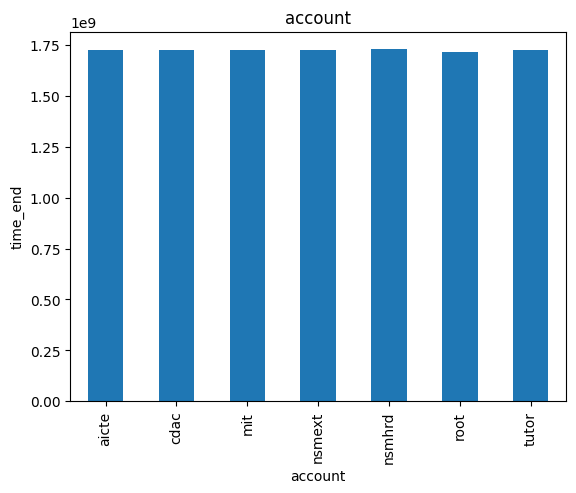

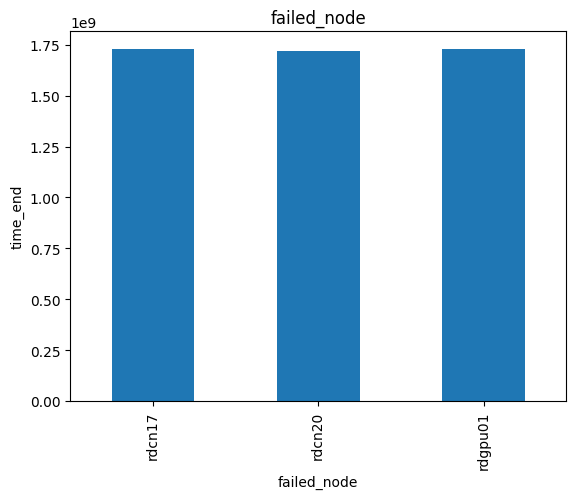

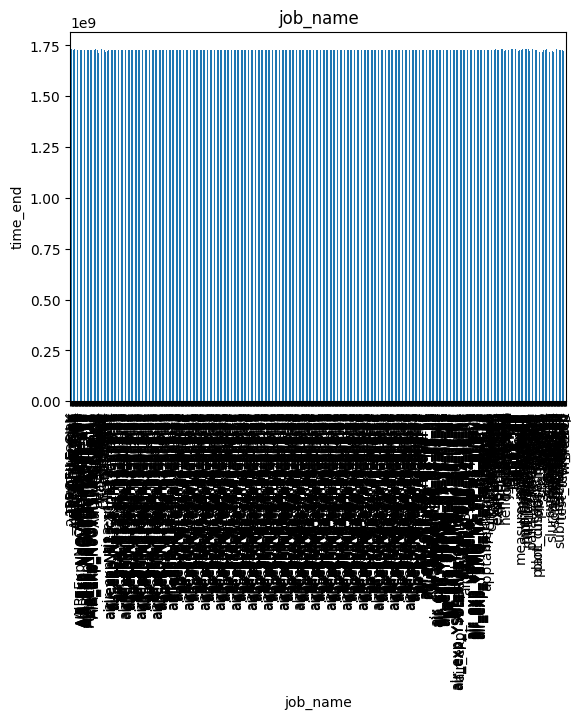

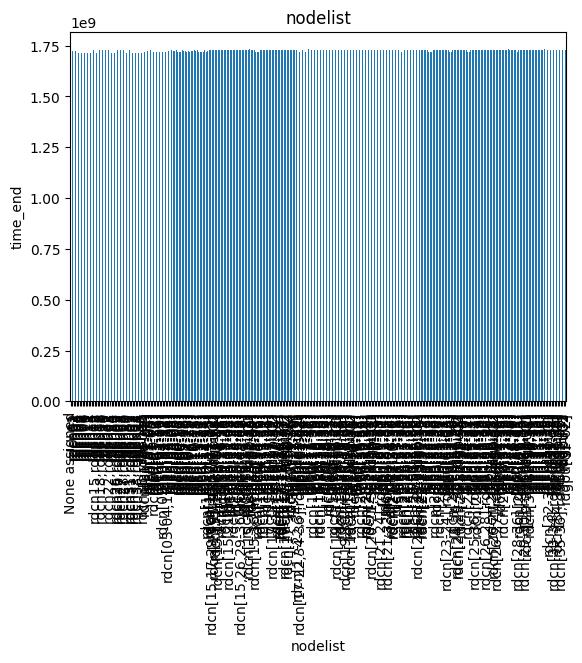

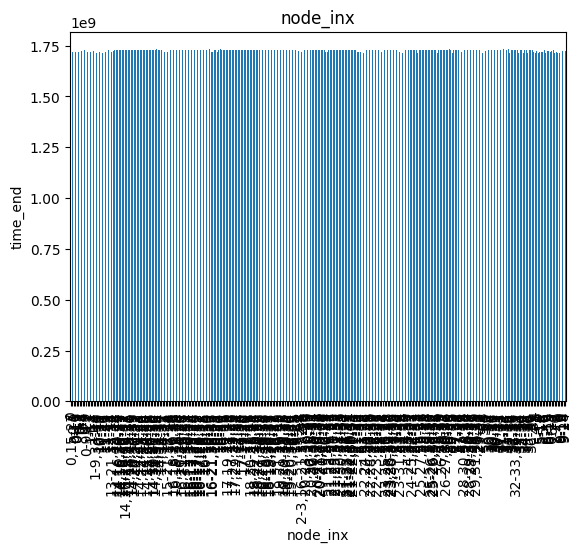

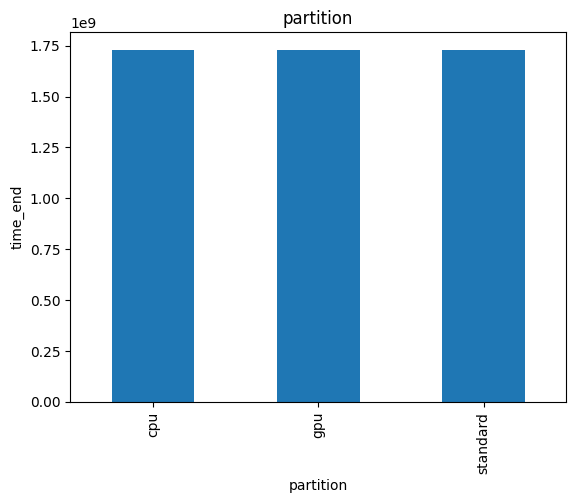

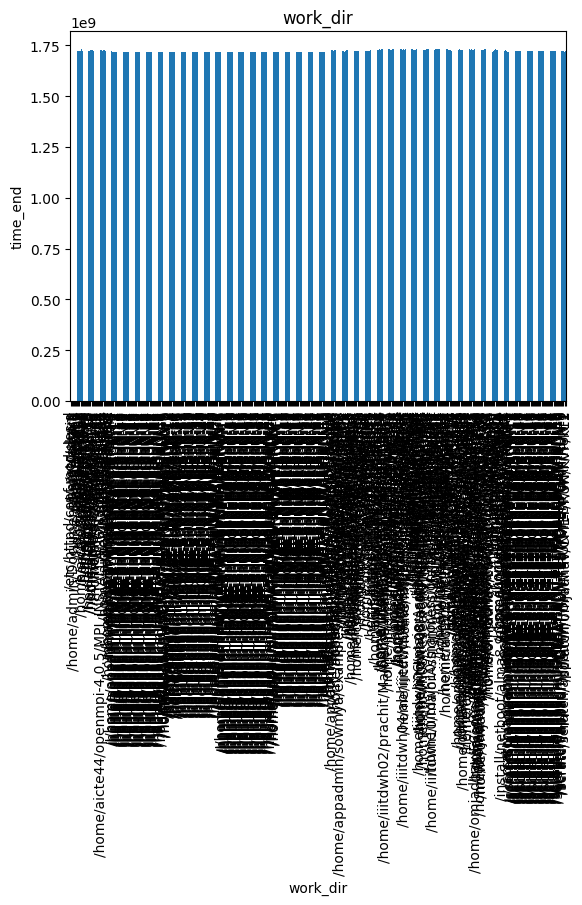

d:\CDAC_PROJECTS\full_package_of_slurm_project\Monitoring_Portal_ML\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


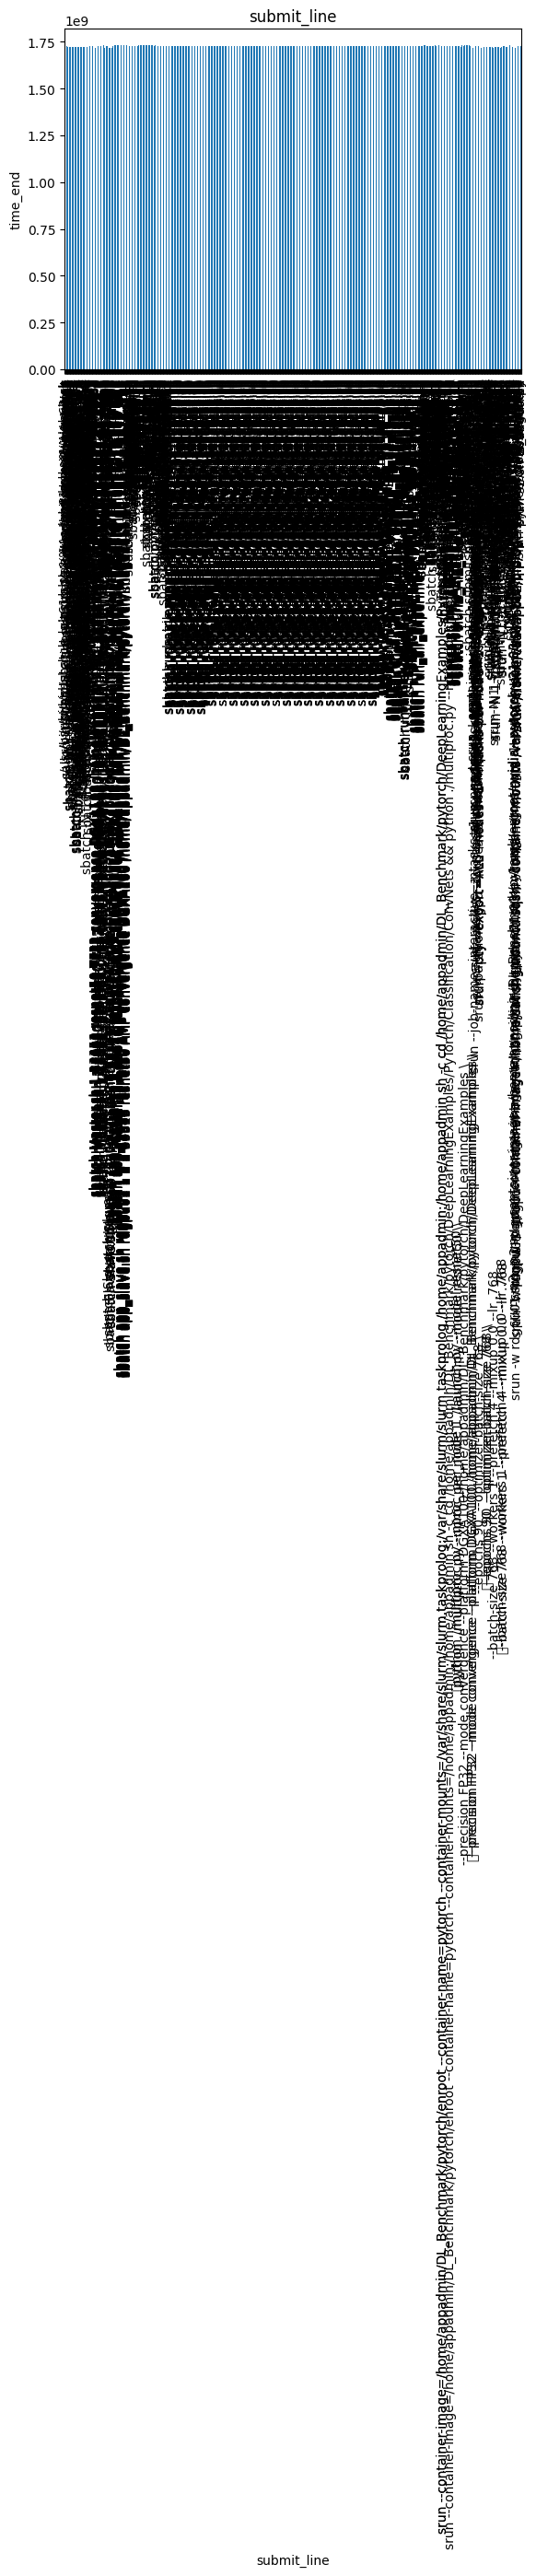

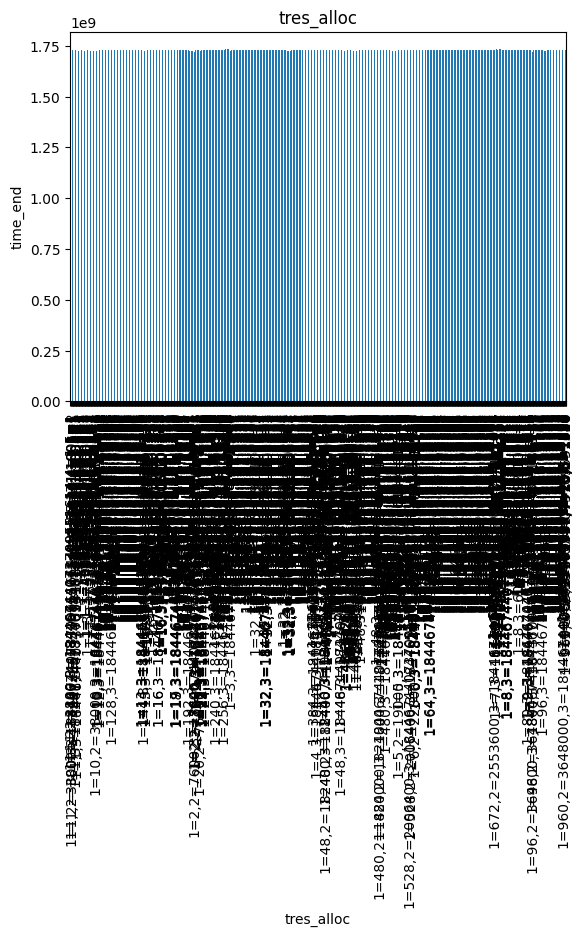

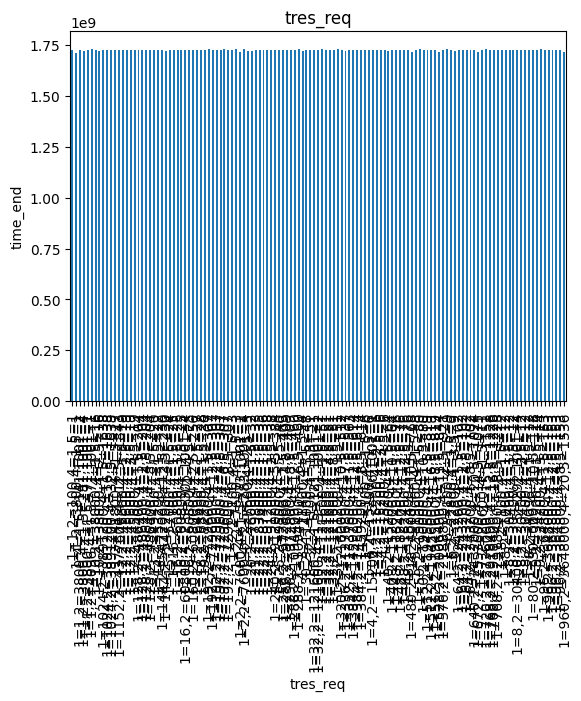

In [27]:
## Find out the relationship between categorical variable and dependent feature end time

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['time_end'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('time_end')
    plt.title(feature)
    plt.show()